#                                        DECISION TREES

## FIND THE FLAG
#### Guess the flag of a continent based on several features like color, shape etc using Decision Trees

[Data Source](http://archive.ics.uci.edu/ml/machine-learning-databases/flags/)

In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Loading the dataframe
flags = pd.read_csv('flags.csv',header=0)
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [5]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [6]:
flags.shape

(194, 30)

In [7]:
#Decision tree will classify what "Landmass" the country is on
labels = flags["Landmass"]

In [8]:
#Lets see if we can predict tha flag based on its colors only
data = flags[["Red",
  "Green",
  "Blue",
  "Gold",
  "White",
  "Black",
  "Orange"]]

In [9]:
#splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

In [11]:
#creating a decision tree classifier
tree = DecisionTreeClassifier(random_state = 1)

In [12]:
#fitting the tree into training data
tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [13]:
tree.score(test_data, test_labels)

0.3469387755102041

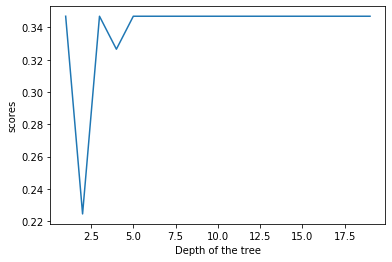

In [15]:
#Tuning the Model
scores =[]
for i in range(1, 20):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))
#plot tree's score to the depth of the tree
plt.plot(range(1, 20), scores)
plt.xlabel('Depth of the tree')
plt.ylabel('scores')
plt.show()

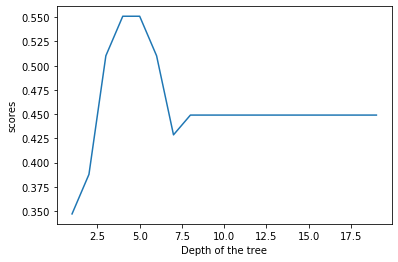

In [17]:
#The graph shows that depth does not have an impact on performance
#This is an indication that we might not be using enough features
#Adding more features like shapes to our dataframe
new_data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]
train_data, test_data, train_labels, test_labels = train_test_split(new_data, labels, random_state = 1)
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data, train_labels)
scores =[]
for i in range(1, 20):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))
#plot tree's score to the depth of the tree
plt.plot(range(1, 20), scores)
plt.xlabel('Depth of the tree')
plt.ylabel('scores')
plt.show()

# Conclusions
That graph looks more like what we’d expect. If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.